## Sampling Stats Analysis: DJ & Spotify Analysis

### Project Description
 The provided code analyzes the distribution of song tempos from a Spotify dataset and demonstrates concepts of population and sampling distributions. It calculates statistics such as the mean, minimum, and variance of sample distributions, compares them to population statistics, and estimates probabilities using the normal distribution

### Analysis
###### The dataset contains a column, tempo, which represents the speed of songs in beats per minute (BPM). The analysis includes the following steps:

1. Population Analysis:

The code plots the distribution of all song tempos to understand their spread and central tendency.

2. Sampling Analysis:

From the population, random samples of size 30 are taken repeatedly (500 iterations).
For each sample, specific statistics (mean, minimum, variance) are calculated.
The resulting sampling distributions of these statistics are plotted and compared to the corresponding population statistics.

3. Statistical Calculations:

The population mean and standard deviation of the tempos are computed.
The standard error of the mean for samples of size 30 is calculated.
Probabilities are estimated for observing specific average tempos from samples of size 30:
Probability of observing a tempo ≤ 140 BPM.
Probability of observing a tempo ≥ 150 BPM.


### Summary
###### The code demonstrates key statistical concepts:

Population Distribution: Provides a visual representation of how song tempos are distributed across the dataset.
Sampling Distribution: Shows how sampling impacts the distribution of statistical measures and illustrates the central limit theorem (CLT), which states that the sampling distribution of the sample mean approaches normality as the sample size increases.
Probability Calculations: Uses the standard normal distribution to estimate the likelihood of specific average tempos being observed in samples.

### Observations
###### Population Mean and Standard Deviation:
- These provide an overall understanding of the central tendency and variability in song tempos.
- The sampling mean approximates the population mean, showcasing the reliability of sample statistics.
- Variance and minimum show more variability in their sampling distributions.
- Smaller than the population standard deviation, indicating reduced variability in sample means.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

First we need to write and prepare the functions and logic to the plots and samplings

In [2]:
# Function to choose a statistic based on input
def choose_statistic(x, sample_stat_text):
    if sample_stat_text == "Mean":
        return np.mean(x)
    elif sample_stat_text == "Minimum":
        return np.min(x)
    elif sample_stat_text == "Variance":
        return np.var(x)
    else:
        raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

In [3]:
# Function to plot population distribution
def population_distribution(population_data):
    sns.histplot(population_data, stat='density')
    plt.title("Population Distribution")
    plt.xlabel('')
    plt.show()
    plt.clf()


In [4]:
# Function to plot sampling distribution
def sampling_distribution(population_data, samp_size, stat):
    sample_stats = []
    for i in range(500):
        samp = np.random.choice(population_data, samp_size, replace=False)
        sample_stat = choose_statistic(samp, stat)
        sample_stats.append(sample_stat)
    
    pop_statistic = round(choose_statistic(population_data, stat), 2)
    sns.histplot(sample_stats, stat='density')
    plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
    plt.axvline(pop_statistic, color='g', linestyle='dashed', label=f'Population {stat}')
    plt.axvline(np.mean(sample_stats), color='orange', linestyle='dashed', label=f'Mean of the Sample {stat}s')
    plt.legend()
    plt.show()
    plt.clf()


In [5]:
# Boxplot for tempo distribution
def boxplot_tempo(population_data):
    sns.boxplot(x=population_data)
    plt.title("Boxplot of Song Tempos")
    plt.xlabel("Tempo (BPM)")
    plt.show()
    plt.clf()

In [6]:
# Scatter plot of tempo vs another variable (if available)
def scatterplot_with_tempo(data, column):
    if column in data.columns:
        sns.scatterplot(x=data[column], y=data['tempo'])
        plt.title(f"Scatterplot of Tempo vs {column}")
        plt.xlabel(column)
        plt.ylabel("Tempo (BPM)")
        plt.show()
        plt.clf()
    else:
        print(f"Column '{column}' not found in the dataset.")

Now can load the data

In [7]:
spotify_data = pd.read_csv("spotify_data.csv")

In [8]:
# Preview the dataset
print("\nDataset Preview:\n", spotify_data.head(3))


Dataset Preview:
      tempo  danceability  energy  instrumentalness  liveness  valence
0  156.985         0.831   0.814          0.013400    0.0556   0.3890
1  115.080         0.719   0.493          0.000000    0.1180   0.1240
2  218.050         0.850   0.893          0.000004    0.3720   0.0391


In [9]:
# Preview the basic info
print("\nDataset Statistics Preview:\n", spotify_data.describe())


Dataset Statistics Preview:
               tempo  danceability        energy  instrumentalness  \
count  42305.000000  42305.000000  42305.000000      42305.000000   
mean     147.474056      0.639364      0.762516          0.283048   
std       23.844623      0.156617      0.183823          0.370791   
min       57.967000      0.065100      0.000243          0.000000   
25%      129.931000      0.524000      0.632000          0.000000   
50%      144.973000      0.646000      0.803000          0.005940   
75%      161.464000      0.766000      0.923000          0.722000   
max      220.290000      0.988000      1.000000          0.989000   

           liveness       valence  
count  42305.000000  42305.000000  
mean       0.214079      0.357101  
std        0.175576      0.233200  
min        0.010700      0.018700  
25%        0.099600      0.161000  
50%        0.135000      0.322000  
75%        0.294000      0.522000  
max        0.988000      0.988000  


How many record do we have here?

In [10]:
print("\nTotal Number of Records in the Dataset:")
print(len(spotify_data))


Total Number of Records in the Dataset:
42305


##### Let´s now jump to the plots and see the results using our functions

In [11]:
# we need to siolate the tempos column in a single variable to plot this values
song_tempos = spotify_data['tempo']

##### Plots

- Population distribution with the mean labeled

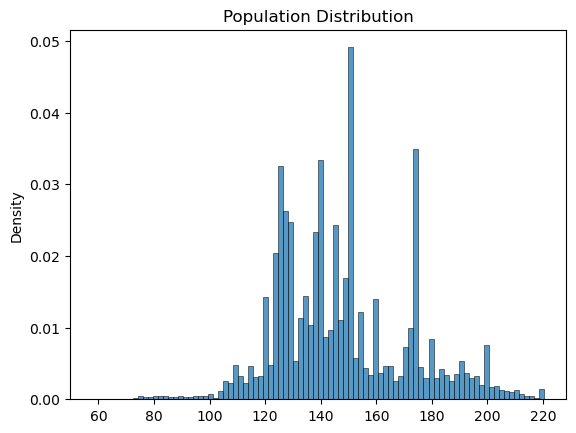

<Figure size 640x480 with 0 Axes>

In [12]:
population_distribution(song_tempos)

- Boxplot for tempo distribution

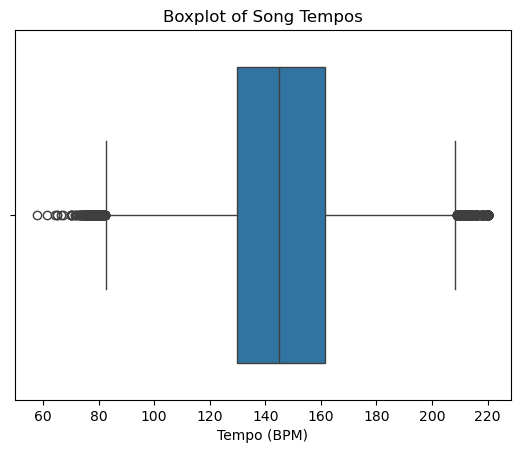

<Figure size 640x480 with 0 Axes>

In [13]:
boxplot_tempo(song_tempos)

- Scatterplot with tempo and energy variable

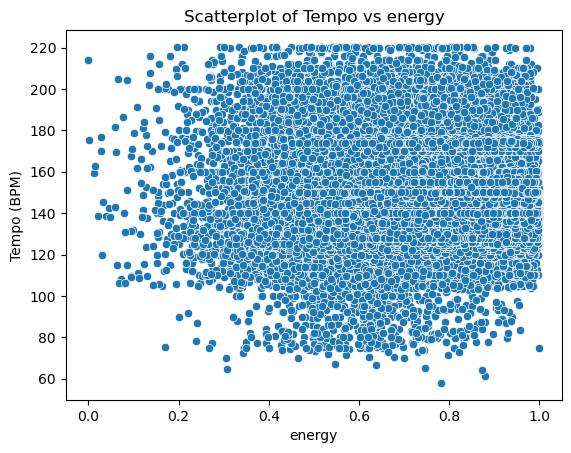

<Figure size 640x480 with 0 Axes>

In [14]:
scatterplot_with_tempo(spotify_data, 'energy')

- Sampling distribution of the sample minimum

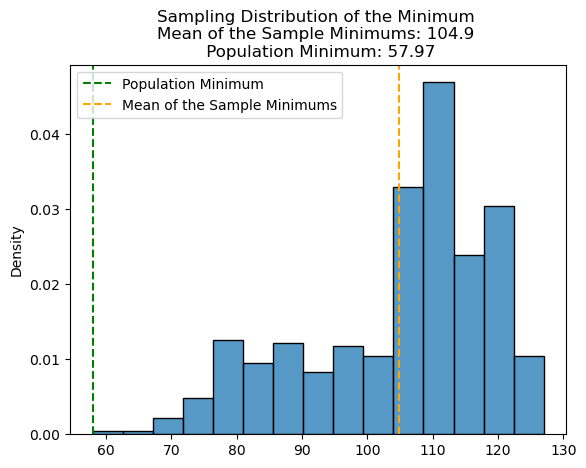

<Figure size 640x480 with 0 Axes>

In [15]:
sampling_distribution(song_tempos, 30, "Minimum")

- Sampling distribution of the sample mean

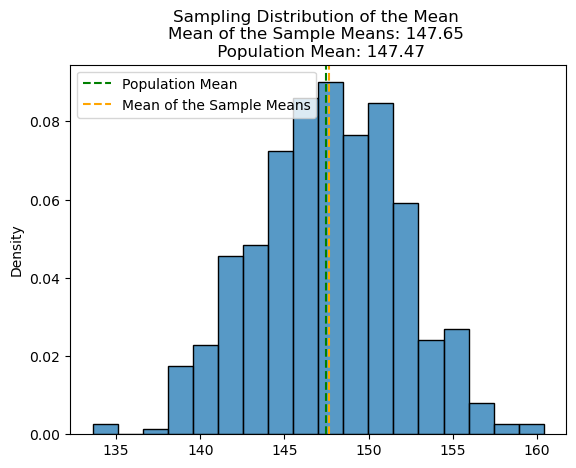

<Figure size 640x480 with 0 Axes>

In [16]:
sampling_distribution(song_tempos, 30, "Mean")

- Sampling distribution of the sample variance


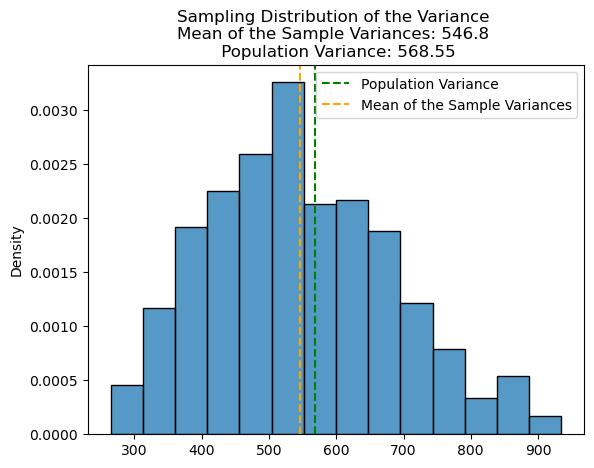

<Figure size 640x480 with 0 Axes>

In [17]:
sampling_distribution(song_tempos, 30, "Variance")

##### Keep calculating more statistics related to the tempo column
Here we sill calculate:
- population mean
- standard deviation
- population covariance

In [18]:
population_mean = np.mean(song_tempos)
population_std = np.std(song_tempos)
population_cov = np.cov(song_tempos)
print("\nPopulation Mean:", population_mean)
print("Population Standard Deviation:", population_std)
print("Population Covariance is:", population_cov)


Population Mean: 147.4740559035575
Population Standard Deviation: 23.8443414956797
Population Covariance is: 568.5660610520232


In [19]:
# Calculate the standard error
standard_error = population_std / (30 ** 0.5)
print("\nStandard Error:", standard_error)


Standard Error: 4.353361235346748


See the probability of observing an average tempo of 140 bpm or lower

In [20]:
prob_140_or_lower = stats.norm.cdf(140, population_mean, standard_error)
print("\nProbability of observing average tempo <= 140 bpm:", prob_140_or_lower)


Probability of observing average tempo <= 140 bpm: 0.043003550159586706


Calculate the probability of observing an average tempo of 150 bpm or higher

In [21]:
prob_150_or_higher = 1 - stats.norm.cdf(150, population_mean, standard_error)
print("Probability of observing average tempo >= 150 bpm:", prob_150_or_higher)

Probability of observing average tempo >= 150 bpm: 0.28088028101821827


### Conclusions

**Central Tendency:**
The sample means are a reliable estimator of the population mean, as demonstrated by the close alignment between the two.

**Effect of Sample Size:**
Larger samples reduce the variability of the sampling distribution, as evidenced by the standard error calculation.

**Probabilities:**
The low probability of observing average tempos ≤ 140 BPM suggests such samples are rare. Similarly, the probability of observing average tempos ≥ 150 BPM is also low, highlighting these as outliers.

**Application:**
This analysis can guide playlist creation or recommendations by understanding tempo preferences and common ranges.